#Step 1: Import Libraries
Begin by importing the necessary libraries. These include Pandas for data manipulation, Scikit-Learn for machine learning, and Matplotlib/Seaborn for data visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Step 2: Data Collection and Initial Exploration
Load the Dataset

In [3]:

df = pd.read_csv('/content/HRDataset_v14.csv')
df


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


Explore the Dataset

In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

#Step 3: Data Cleaning and Preprocessing
Handle Missing Values

In [6]:
df = df.dropna()
df


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670,...,David Stanley,14.0,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211,...,Kissy Sullivan,20.0,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,"Wilber, Barry",10048,1,1,1,5,5,3,0,55140,...,Amy Dunn,11.0,Website,Fully Meets,5.00,3,0,2/15/2015,0,7
302,"Wilkes, Annie",10204,0,2,0,5,5,3,0,58062,...,Ketsia Liebig,19.0,Google Search,Fully Meets,3.60,5,0,2/6/2011,0,9
303,"Williams, Jacquelyn",10264,0,0,0,5,5,3,1,59728,...,Ketsia Liebig,19.0,Diversity Job Fair,Fully Meets,4.30,4,0,6/2/2014,0,16
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.00,3,0,1/19/2016,0,7


Encode Categorical Variables

In [7]:
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


Feature Scaling

In [17]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,-1.715476,-0.940796,1.101257,0.061455,1.167748,0.335497,-1.867590,0.170598,-0.426401,2.084314,...,1.219877,-1.249088,0.583847,-0.194461,1.078480,-1.030655,2.862253,-0.475597,-0.404910,1.029702
2,-1.682166,0.318066,1.101257,0.061455,-0.856349,0.335497,0.314762,0.170598,-0.426401,-0.039542,...,0.508139,0.299707,1.162134,-0.194461,-1.327736,-1.030655,-0.396955,1.089428,-0.404910,-1.392344
4,-1.648855,-1.109393,-0.908054,1.126680,-0.856349,0.335497,0.314762,0.170598,-0.426401,-0.799637,...,1.397811,2.138901,0.005560,-0.194461,1.128092,0.134433,-0.396955,-0.912348,-0.404910,-1.565347
10,-1.615545,0.947496,1.101257,0.061455,-0.856349,0.335497,0.314762,0.170598,2.345208,-0.592803,...,-0.915335,-0.281091,-1.151013,-0.194461,0.135839,0.134433,-0.396955,-1.203515,-0.404910,0.164686
11,-1.582235,0.835098,1.101257,0.061455,1.167748,0.335497,0.314762,0.170598,2.345208,-0.994045,...,0.508139,0.299707,-1.151013,-0.194461,0.135839,-1.030655,-0.396955,1.307803,-0.404910,0.683696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1.582235,-1.345430,1.101257,0.061455,1.167748,0.335497,0.314762,0.170598,-0.426401,-0.567520,...,-1.449138,-0.571491,2.896994,-0.194461,1.128092,-1.030655,-0.396955,-0.693972,-0.404910,-0.700331
302,1.615545,0.407984,-0.908054,1.126680,-0.856349,0.335497,0.314762,0.170598,-0.426401,-0.410337,...,0.330205,0.202907,0.005560,-0.194461,-0.608352,1.299521,-0.396955,-0.257221,-0.404910,-0.354324
303,1.648855,1.082374,-0.908054,-1.003770,-0.856349,0.335497,0.314762,0.170598,2.345208,-0.320718,...,0.330205,0.202907,-1.151013,-0.194461,0.259870,0.134433,-0.396955,1.380595,-0.404910,0.856699
304,1.682166,-1.514027,-0.908054,-1.003770,1.167748,0.335497,0.314762,1.944815,-0.426401,0.259117,...,-1.093270,-0.474691,1.162134,-1.879791,1.128092,-1.030655,-0.396955,-1.385495,-0.404910,-0.700331


#Step 3: Data Splitting and Model Building and Training
Define Features and Target Variable

In [10]:
X = df.drop(columns=['Termd'])
X # Assuming 'Termd' is the target column for attrition
y = df['Termd']
y

,Termd
1,0.0
2,0.0
4,0.0
10,0.0
11,0.0
...,...
301,0.0
302,0.0
303,0.0
304,0.0


Split the Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Build and Train the Model

In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#Step 5: Model Evaluation
Predict and Evaluate

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        32

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

Confusion Matrix:
 [[32]]


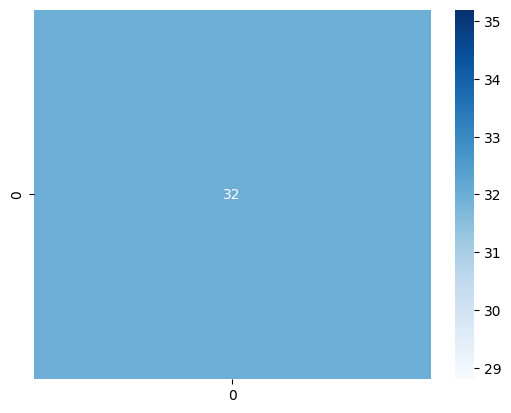

In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()


#Step 6: Feature Importance
Plot Feature Importances

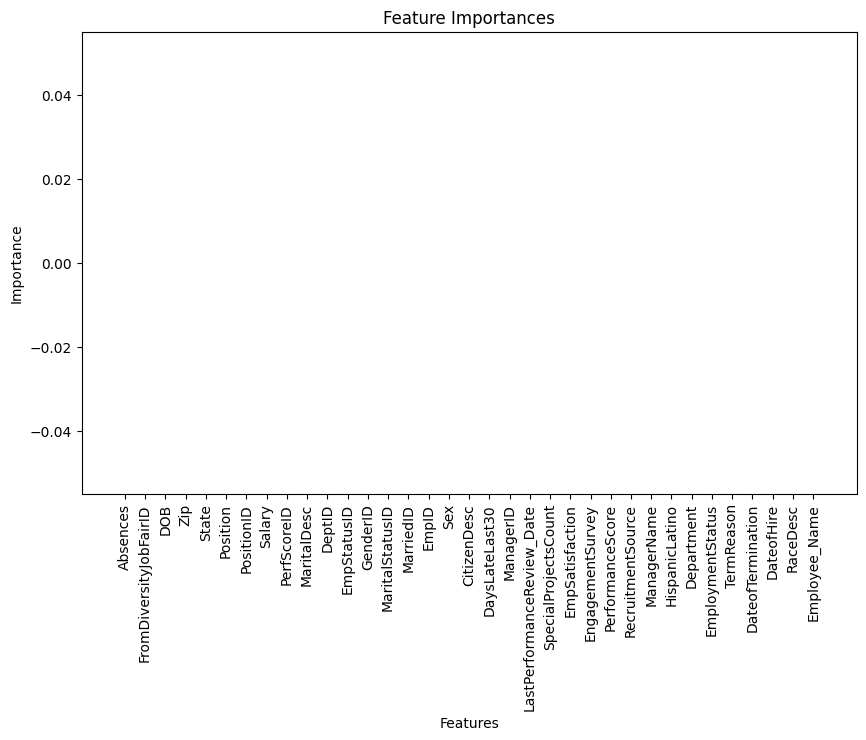

In [14]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


#Step 7: Model Tuning (Optional)
Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0
